# Lab | Customer Analysis Final Round


For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

It's time to put it all together. Remember the previous rounds and follow the steps as shown in previous lectures.

## 01 - Problem (case study)

- Data Description.

- Goal.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import math


import warnings
warnings.filterwarnings('ignore')

## 02 - Getting Data

Read the .csv file.

In [2]:
data = pd.read_csv('./files_for_lab/csv_files/marketing_customer_analysis.csv')

## 03 - Cleaning/Wrangling/EDA

- Change headers names.

In [3]:
def standardize_headers(data):
    data.columns = data.columns.str.lower().str.replace(' ', '_')
standardize_headers(data)

- Deal with NaN values.

In [4]:
data.isna().any()

customer                         False
state                            False
customer_lifetime_value          False
response                         False
coverage                         False
education                        False
effective_to_date                False
employmentstatus                 False
gender                           False
income                           False
location_code                    False
marital_status                   False
monthly_premium_auto             False
months_since_last_claim          False
months_since_policy_inception    False
number_of_open_complaints        False
number_of_policies               False
policy_type                      False
policy                           False
renew_offer_type                 False
sales_channel                    False
total_claim_amount               False
vehicle_class                    False
vehicle_size                     False
dtype: bool

- Categorical Features.

In [5]:
categorical = data.select_dtypes(include='object')
categorical.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


- Numerical Features.

In [6]:
numerical = data.select_dtypes(include='number')
numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


- Exploration.

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


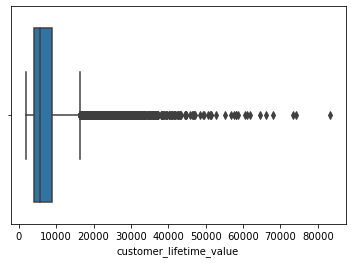

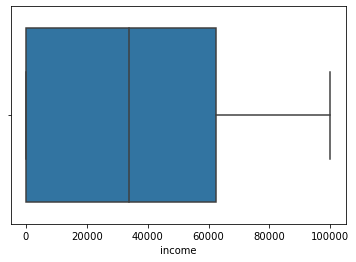

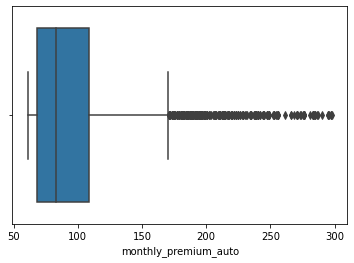

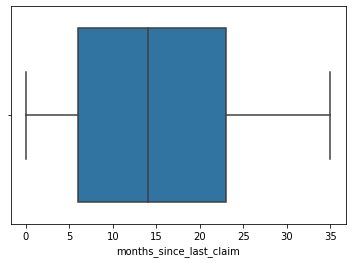

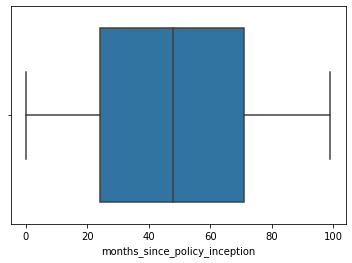

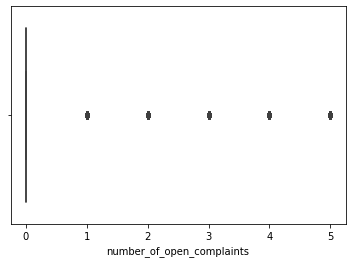

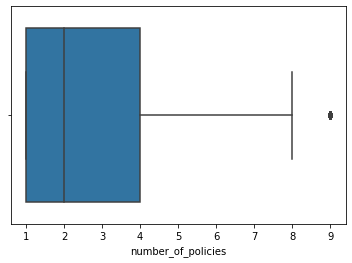

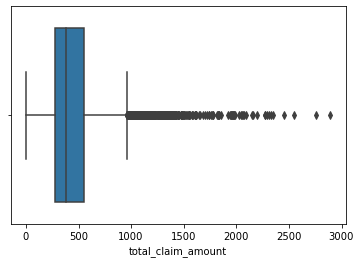

In [8]:
for column in numerical:
    sns.boxplot(numerical[column])
    plt.show()

## 04 - Processing Data

In [9]:
#Insight from boxplot: columns customer_lifetime_value, monthly_premium_auto & total_claim_amount are the ones with higher outliers

- Dealing with outliers.

In [10]:
numerical.shape

(9134, 8)

In [11]:
#Remove outliers from the 3 columns

def remove_outliers(data, threshold=1.5, in_columns=numerical, skip_columns=[]):
    for column in in_columns:
        iqr = np.percentile(data[column],75) - np.percentile(data[column],25)
        upper_limit = np.percentile(data[column],75) + (threshold * iqr)
        lower_limit = np.percentile(data[column],25) - (threshold * iqr)
        data = data[(numerical[column]>lower_limit) & (data[column]<upper_limit)]
    return data
numerical = remove_outliers (numerical, in_columns =['customer_lifetime_value','monthly_premium_auto','total_claim_amount'])
numerical.shape

(7789, 8)

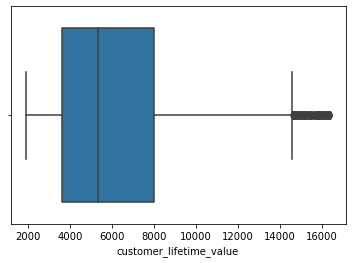

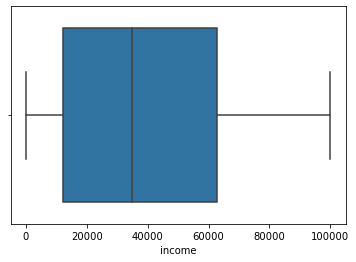

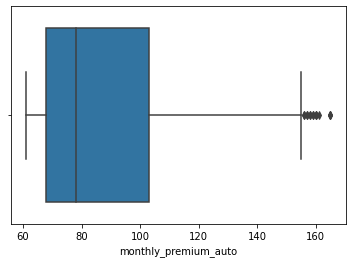

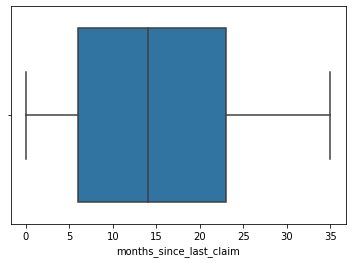

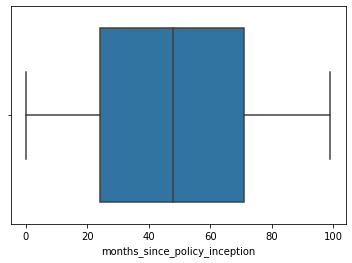

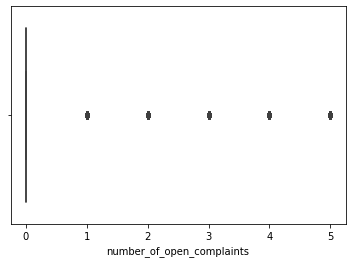

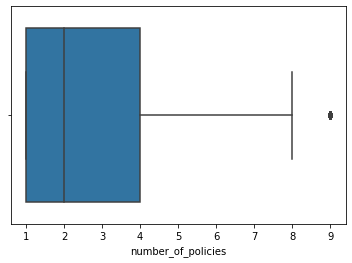

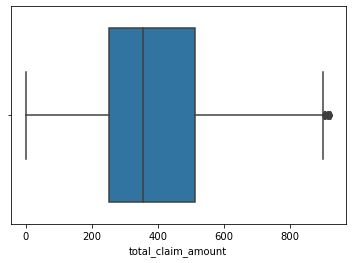

In [12]:
for column in numerical:
    sns.boxplot(numerical[column])
    plt.show()

- Normalization.

In [13]:
y = data['total_claim_amount']
x = data.drop(['total_claim_amount'], axis=1)

x_numerical = x.select_dtypes(include = np.number)
x_categorical = x.select_dtypes(include = np.object)

In [14]:
def boxcox_transform(data):
    numeric_cols = data.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        data[column] = np.where(data[column]<=0, np.NAN, data[column]) 
        data[column] = data[column].fillna(data[column].mean())
        transformed_data, ci = stats.boxcox(data[column])
        data[column] = transformed_data
        _ci[column] = [ci] 
    return data, _ci

x_numerical_normalized, _ci = boxcox_transform(x_numerical)
x_numerical_normalized.shape

(9134, 7)

- Encoding Categorical Data.

In [15]:
categorical_encoded = pd.get_dummies(x_categorical, drop_first=True)
categorical_encoded

,customer_AA11235,customer_AA16582,customer_AA30683,customer_AA34092,customer_AA35519,customer_AA56476,customer_AA69265,customer_AA71604,customer_AA93585,customer_AB13432,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9130,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9131,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9132,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


- Splitting into train set and test set.

In [16]:
x_numerical_normalized.shape, categorical_encoded.shape

((9134, 7), (9134, 9234))

In [17]:
x_numerical_normalized.isnull().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
dtype: int64

In [18]:
X = np.concatenate([x_numerical_normalized, categorical_encoded], axis=1)
X

array([[2.70383943e+00, 1.24793707e+03, 6.85347394e-01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.75492635e+00, 1.16796172e+03, 6.85870602e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.78077243e+00, 1.14406308e+03, 6.86039016e-01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [2.76206241e+00, 1.16796172e+03, 6.85725382e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.75839723e+00, 7.04383672e+02, 6.85898381e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.70016535e+00, 1.16796172e+03, 6.85560467e-01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

## 05 - Modeling

Apply model.

In [19]:
X.shape, y.shape

((9134, 9241), (9134,))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
predictions  = model.predict(X_test)
predictions.shape

(1827,)

## 06 - Model Validation

- R2.

In [23]:
r2 = r2_score(y_test, predictions)
print(r2)

0.7135072177173245


- MSE.

In [24]:
mse = mean_squared_error(y_test, predictions)
print(mse)

23819.698015975497


- RMSE.

In [25]:
rmse = math.sqrt(mse)
print(rmse)

154.3363146377919


- MAE.

In [26]:
n = len(X_test)
p = X_test.shape[1]
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
print(adj_r2)

1.070551020964014


## 07 - Reporting

Present results.